In [2]:
import pandas as pd
import os
import sys

# Add the 'src' folder to the path
sys.path.append(os.path.abspath('../src'))

# Import the load_data function
from preprocessing import load_data

# Load the raw data
data_path = "../data/bank_churn_data.csv"  # Relative to notebooks/
df = load_data(data_path)

# Print basic info
print("Raw dataset shape:", df.shape)
print("Raw columns:", df.columns.tolist())
print("Raw churn distribution:\n", df["Exited"].value_counts())

Raw dataset shape: (165034, 14)
Raw columns: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Raw churn distribution:
 Exited
0    130113
1     34921
Name: count, dtype: int64


Columns in dataset: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Preprocessed churn distribution:
 Exited
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


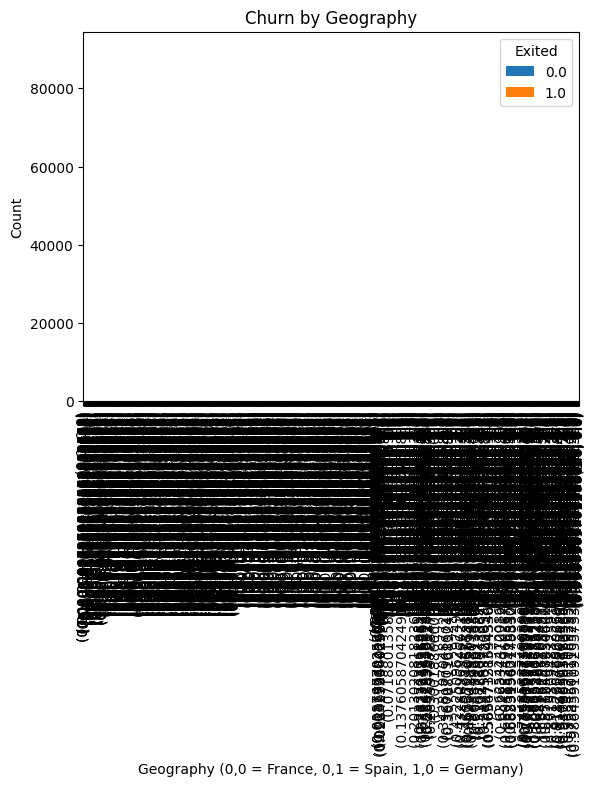

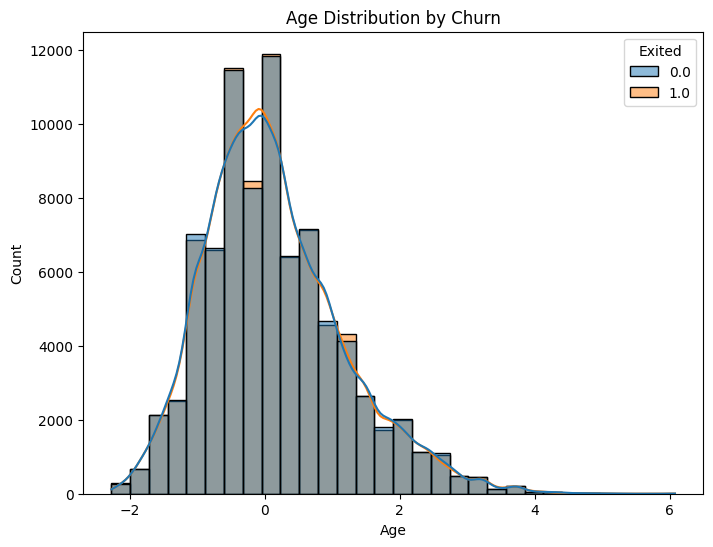

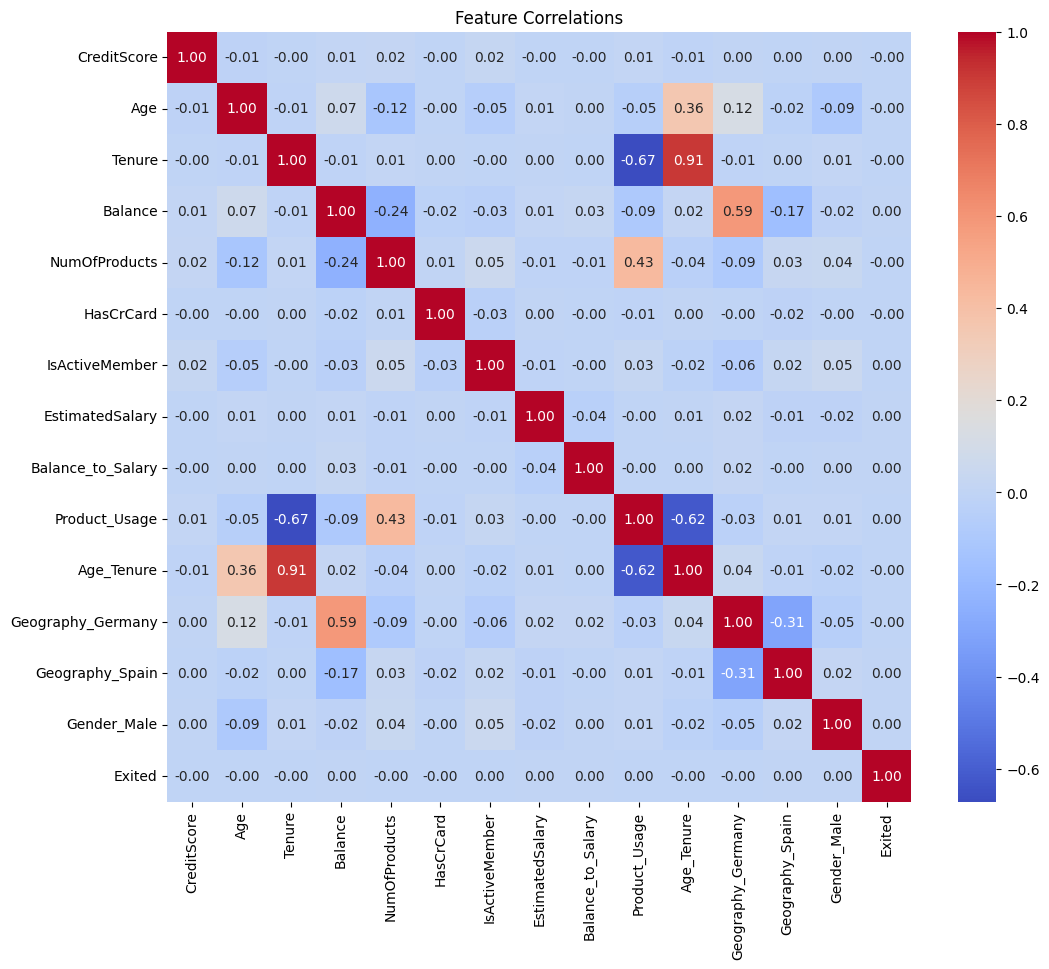

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add the 'src' folder to the path
sys.path.append(os.path.abspath('../src'))

from preprocessing import load_data, preprocess_data

# Load and preprocess the data
data_path = "../data/bank_churn_data.csv"
df = load_data(data_path)
X_train, X_test, y_train, y_test = preprocess_data(df)

# Combine X_train and y_train for analysis
train_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

# Churn distribution
print("Preprocessed churn distribution:\n", train_df["Exited"].value_counts(normalize=True))

# Plot churn by Geography
geo_cols = ["Geography_Germany", "Geography_Spain"]
geo_churn = train_df.groupby(geo_cols + ["Exited"]).size().unstack().fillna(0)
geo_churn.plot(kind="bar", stacked=True)
plt.title("Churn by Geography")
plt.xlabel("Geography (0,0 = France, 0,1 = Spain, 1,0 = Germany)")
plt.ylabel("Count")
plt.show()

# Age distribution by churn
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x="Age", hue="Exited", bins=30, kde=True)
plt.title("Age Distribution by Churn")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

Columns in dataset: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Raw dataset shape: (165034, 14)
Raw churn distribution:
 Exited
0    130113
1     34921
Name: count, dtype: int64
Preprocessed churn distribution:
 Exited
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


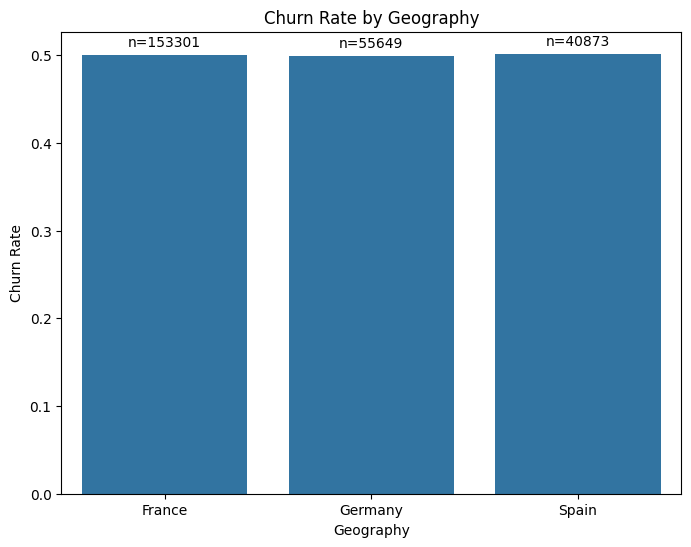

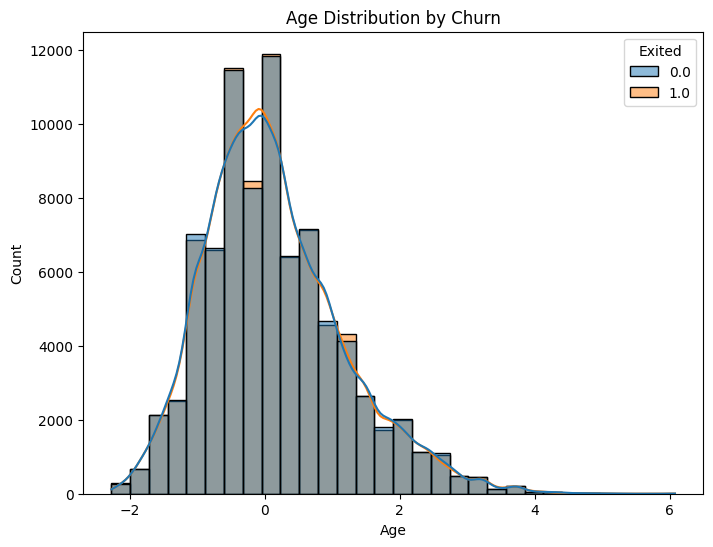

Mean Age by Churn:
 Exited
0.0    0.137143
1.0    0.136466
Name: Age, dtype: float64


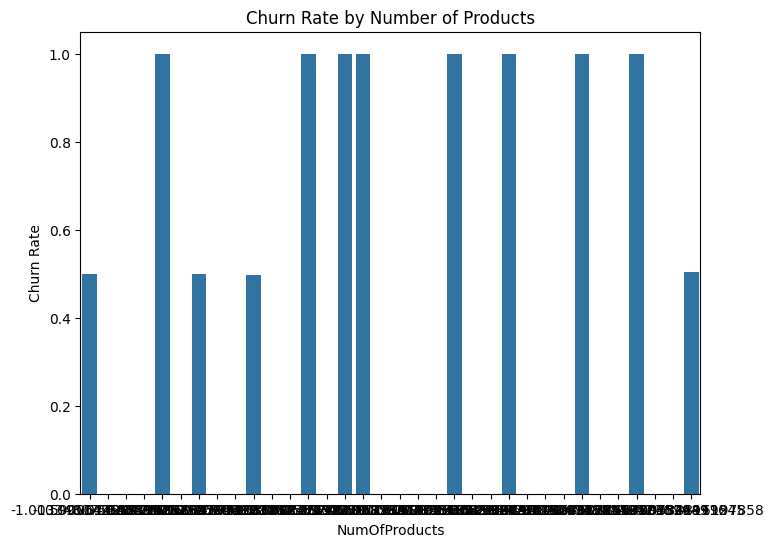

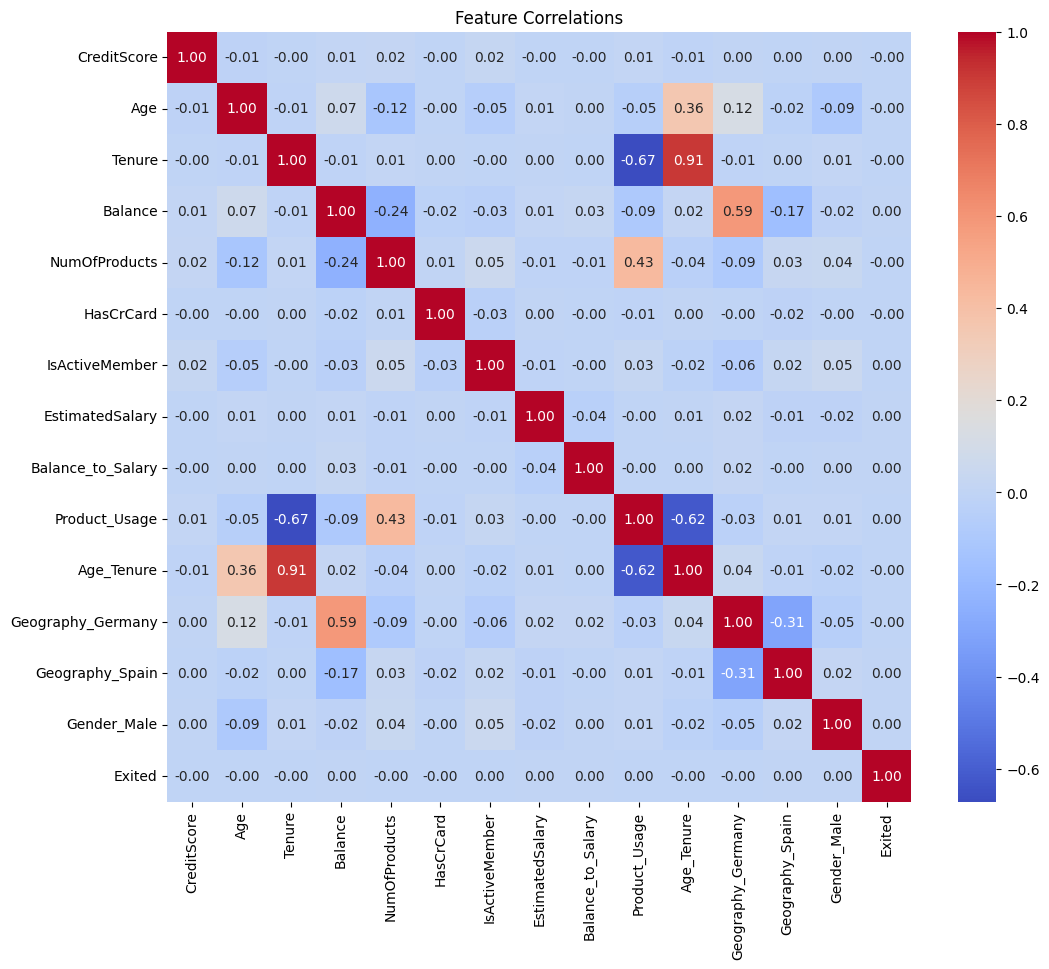

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add the 'src' folder to the path
sys.path.append(os.path.abspath('../src'))
from preprocessing import load_data, preprocess_data

# Load and preprocess the data
data_path = "../data/bank_churn_data.csv"
df = load_data(data_path)
X_train, X_test, y_train, y_test = preprocess_data(df)

# Combine X_train and y_train for analysis
train_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

# Raw dataset info
print("Raw dataset shape:", df.shape)
print("Raw churn distribution:\n", df["Exited"].value_counts())
print("Preprocessed churn distribution:\n", train_df["Exited"].value_counts(normalize=True))

# Improved Churn by Geography (reconstruct Geography column)
train_df["Geography"] = "France"  # Default (0,0)
train_df.loc[train_df["Geography_Spain"] == 1, "Geography"] = "Spain"
train_df.loc[train_df["Geography_Germany"] == 1, "Geography"] = "Germany"
geo_churn_rate = train_df.groupby("Geography")["Exited"].mean()
geo_counts = train_df["Geography"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=geo_churn_rate.index, y=geo_churn_rate.values)
plt.title("Churn Rate by Geography")
plt.ylabel("Churn Rate")
for i, (geo, count) in enumerate(geo_counts.items()):
    plt.text(i, geo_churn_rate[geo] + 0.01, f"n={count}", ha="center")
plt.show()

# Age Distribution and Stats
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x="Age", hue="Exited", bins=30, kde=True)
plt.title("Age Distribution by Churn")
plt.show()
print("Mean Age by Churn:\n", train_df.groupby("Exited")["Age"].mean())

# NumOfProducts vs. Churn
plt.figure(figsize=(8, 6))
prod_churn = train_df.groupby("NumOfProducts")["Exited"].mean()
sns.barplot(x=prod_churn.index, y=prod_churn.values)
plt.title("Churn Rate by Number of Products")
plt.ylabel("Churn Rate")
plt.show()

# Correlation heatmap (exclude Geography string column)
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.drop(columns=["Geography"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

Raw dataset shape: (165034, 14)
Raw churn distribution:
 Exited
0    130113
1     34921
Name: count, dtype: int64
Raw mean Age by Churn:
 Exited
0    36.560480
1    43.958478
Name: Age, dtype: float64
Raw NumOfProducts Analysis:
                Churn_Rate  Sample_Size
NumOfProducts                         
1                0.347119        77374
2                0.060422        84291
3                0.882516         2894
4                0.875789          475


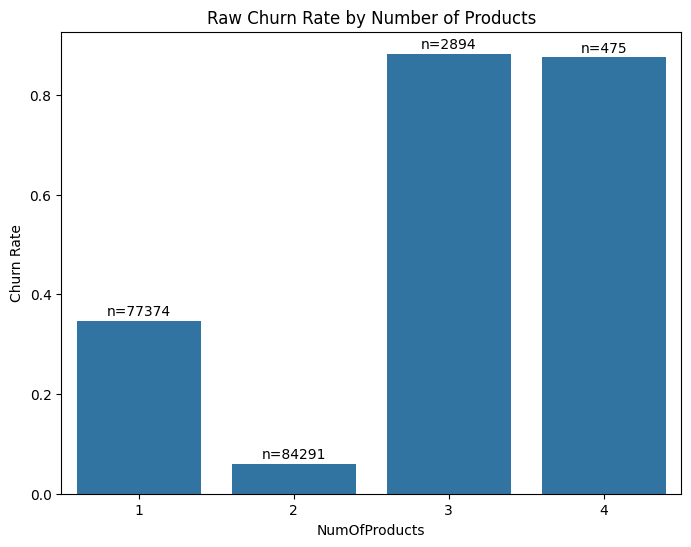

In [8]:
# Raw data checks
print("Raw dataset shape:", df.shape)
print("Raw churn distribution:\n", df["Exited"].value_counts())
print("Raw mean Age by Churn:\n", df.groupby("Exited")["Age"].mean())

# NumOfProducts analysis (raw data)
raw_prod_counts = df.groupby("NumOfProducts").agg({"Exited": ["mean", "count"]})
raw_prod_counts.columns = ["Churn_Rate", "Sample_Size"]
print("Raw NumOfProducts Analysis:\n", raw_prod_counts)

# Plot raw NumOfProducts vs. Churn
plt.figure(figsize=(8, 6))
sns.barplot(x=raw_prod_counts.index, y=raw_prod_counts["Churn_Rate"])
plt.title("Raw Churn Rate by Number of Products")
plt.ylabel("Churn Rate")
for i, (rate, size) in enumerate(zip(raw_prod_counts["Churn_Rate"], raw_prod_counts["Sample_Size"])):
    plt.text(i, rate + 0.01, f"n={size}", ha="center")
plt.show()

Columns in dataset: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Raw dataset shape: (165034, 14)
Raw churn distribution:
 Exited
0    130113
1     34921
Name: count, dtype: int64
Preprocessed churn distribution:
 Exited
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


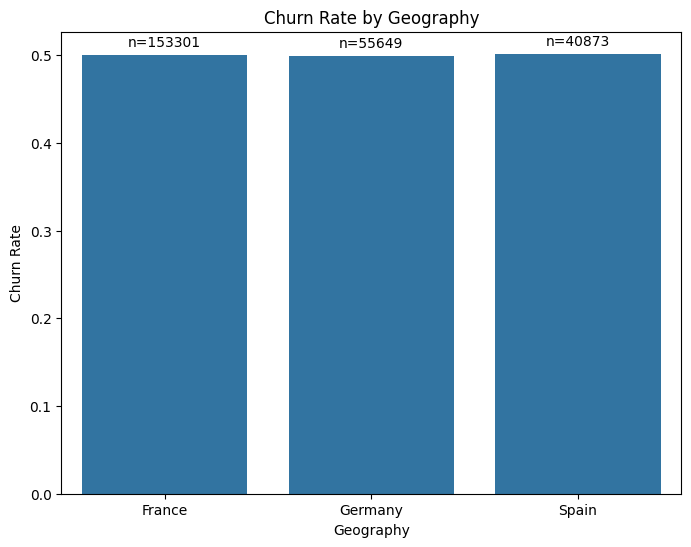

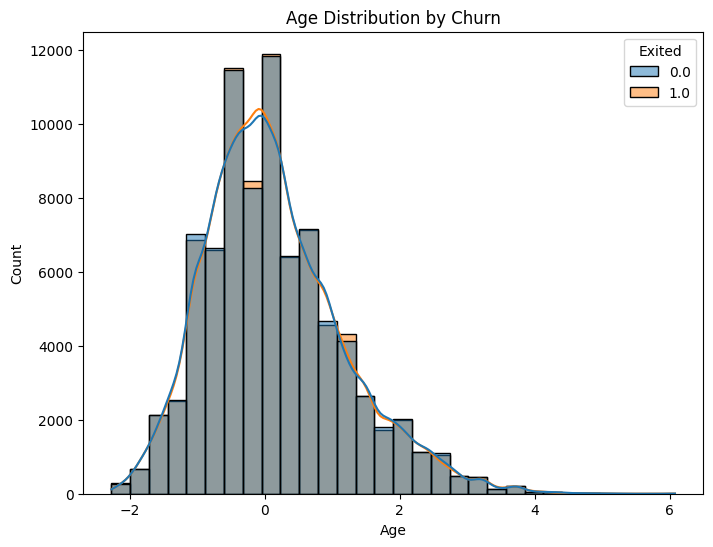

Raw mean Age by Churn:
 Exited
0    36.560480
1    43.958478
Name: Age, dtype: float64
Raw NumOfProducts Analysis:
                Churn_Rate  Sample_Size
NumOfProducts                         
1                0.347119        77374
2                0.060422        84291
3                0.882516         2894
4                0.875789          475


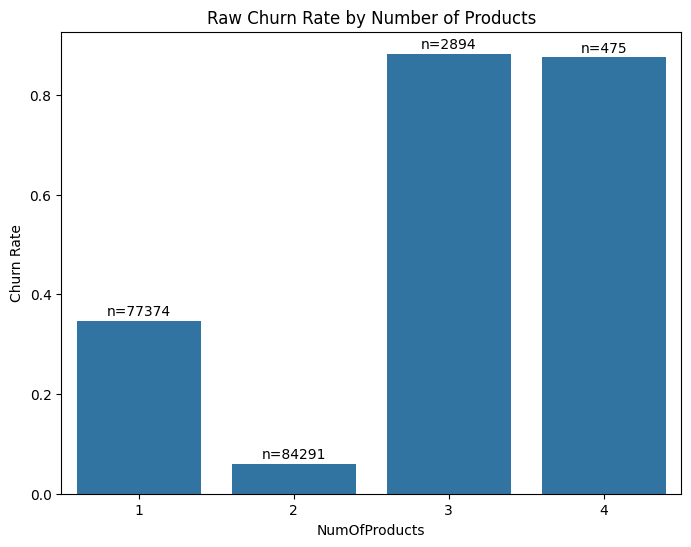

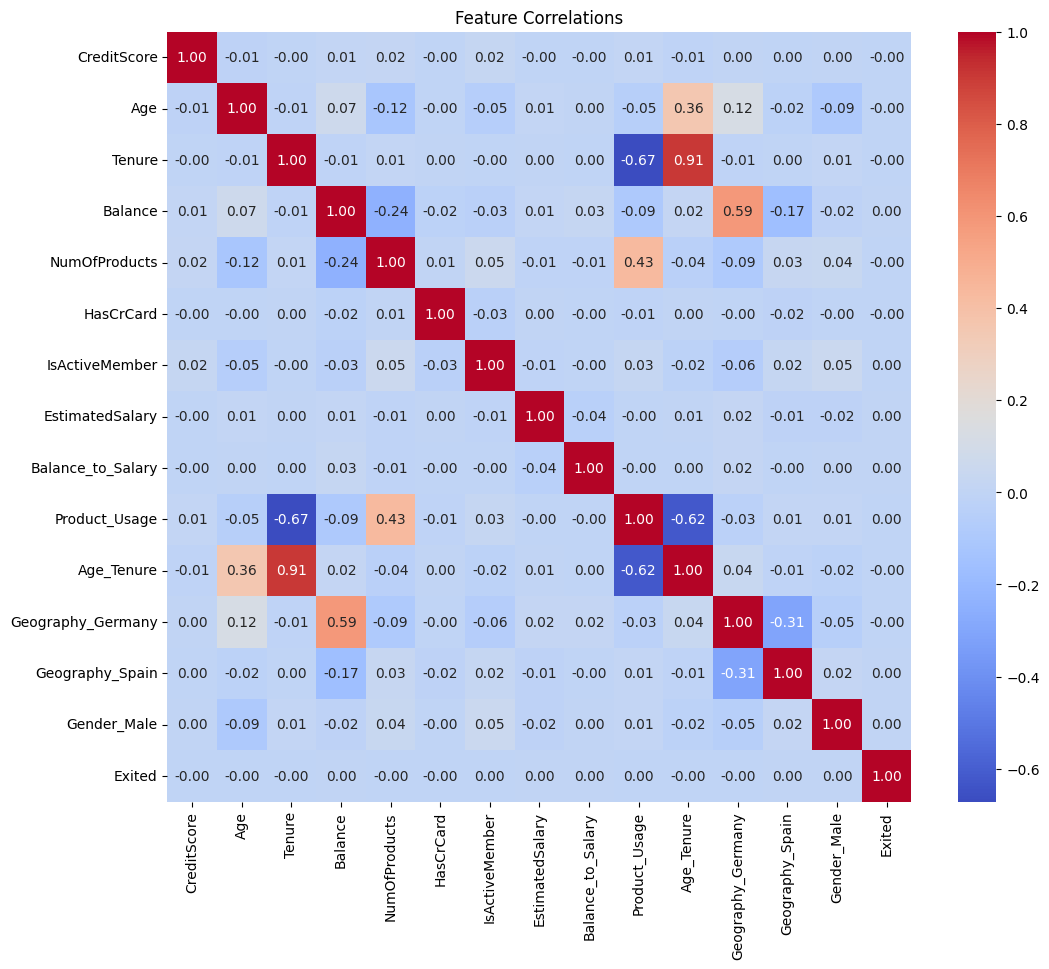

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add the 'src' folder to the path
sys.path.append(os.path.abspath('../src'))
from preprocessing import load_data, preprocess_data

# Load and preprocess the data
data_path = "../data/bank_churn_data.csv"
df = load_data(data_path)
X_train, X_test, y_train, y_test = preprocess_data(df)

# Combine X_train and y_train for analysis
train_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

# Raw dataset info
print("Raw dataset shape:", df.shape)
print("Raw churn distribution:\n", df["Exited"].value_counts())
print("Preprocessed churn distribution:\n", train_df["Exited"].value_counts(normalize=True))

# Churn by Geography
train_df["Geography"] = "France"  # Default (0,0)
train_df.loc[train_df["Geography_Spain"] == 1, "Geography"] = "Spain"
train_df.loc[train_df["Geography_Germany"] == 1, "Geography"] = "Germany"
geo_churn_rate = train_df.groupby("Geography")["Exited"].mean()
geo_counts = train_df["Geography"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=geo_churn_rate.index, y=geo_churn_rate.values)
plt.title("Churn Rate by Geography")
plt.ylabel("Churn Rate")
for i, (geo, count) in enumerate(geo_counts.items()):
    plt.text(i, geo_churn_rate[geo] + 0.01, f"n={count}", ha="center")
plt.show()

# Age Distribution and Stats
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x="Age", hue="Exited", bins=30, kde=True)
plt.title("Age Distribution by Churn")
plt.show()
print("Raw mean Age by Churn:\n", df.groupby("Exited")["Age"].mean())

# Raw NumOfProducts vs. Churn
raw_prod_counts = df.groupby("NumOfProducts").agg({"Exited": ["mean", "count"]})
raw_prod_counts.columns = ["Churn_Rate", "Sample_Size"]
print("Raw NumOfProducts Analysis:\n", raw_prod_counts)
plt.figure(figsize=(8, 6))
sns.barplot(x=raw_prod_counts.index, y=raw_prod_counts["Churn_Rate"])
plt.title("Raw Churn Rate by Number of Products")
plt.ylabel("Churn Rate")
for i, (rate, size) in enumerate(zip(raw_prod_counts["Churn_Rate"], raw_prod_counts["Sample_Size"])):
    plt.text(i, rate + 0.01, f"n={size}", ha="center")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.drop(columns=["Geography"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()